In [1]:
!pip install pycaret
import os

In [2]:
import sys
print(sys.version)


3.10.15 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 07:22:19) [MSC v.1929 64 bit (AMD64)]


In [3]:
!pip install mlflow

In [4]:
import pycaret
import mlflow

In [5]:
pycaret.__version__

'3.3.2'

In [6]:
pwd

'C:\\Users\\HP'

In [7]:
os.chdir(r"C:\Users\HP\Desktop\dvc_tutorial\churn_project\data")

In [8]:
import pandas as pd
file_path= (r"C:\Users\HP\Desktop\dvc_tutorial\churn_project\data\raw_data.csv")
data=pd.read_csv(file_path)
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
#initia;lize setup
from pycaret.classification import *
s=setup(data,target="Churn",session_id=123,
       ignore_features=["customerID"],
       log_experiment=True,
       experiment_name="churn1")

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Numeric features,3


In [10]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7789,0.8060,0.7789,0.7727,0.7741,0.4110,0.4139,0.3290
knn,K Neighbors Classifier,0.7716,0.7792,0.7716,0.7642,0.7667,0.3912,0.3932,0.3860
lr,Logistic Regression,0.7548,0.8295,0.7548,0.7404,0.6886,0.1557,0.2275,1.9020
qda,Quadratic Discriminant Analysis,0.7542,0.7929,0.7542,0.7250,0.7044,0.1996,0.2397,0.3280
rf,Random Forest Classifier,0.7501,0.7778,0.7501,0.7130,0.6983,0.1819,0.2174,0.6180
svm,SVM - Linear Kernel,0.7462,0.7937,0.7462,0.7132,0.6917,0.2081,0.2471,0.3540
ridge,Ridge Classifier,0.7385,0.7839,0.7385,0.6907,0.6592,0.0793,0.1278,0.3400
lda,Linear Discriminant Analysis,0.7385,0.7338,0.7385,0.6907,0.6592,0.0793,0.1278,0.3320
et,Extra Trees Classifier,0.7379,0.7473,0.7379,0.6890,0.6710,0.1069,0.1467,0.6060
lightgbm,Light Gradient Boosting Machine,0.7349,0.7311,0.7349,0.7270,0.7271,0.2888,0.2942,0.5170


2024/11/02 09:17:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/02 09:17:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/02 09:17:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/02 09:17:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/02 09:17:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/02 09:17:16 

In [11]:
print(best_model)

GaussianNB(priors=None, var_smoothing=1e-09)


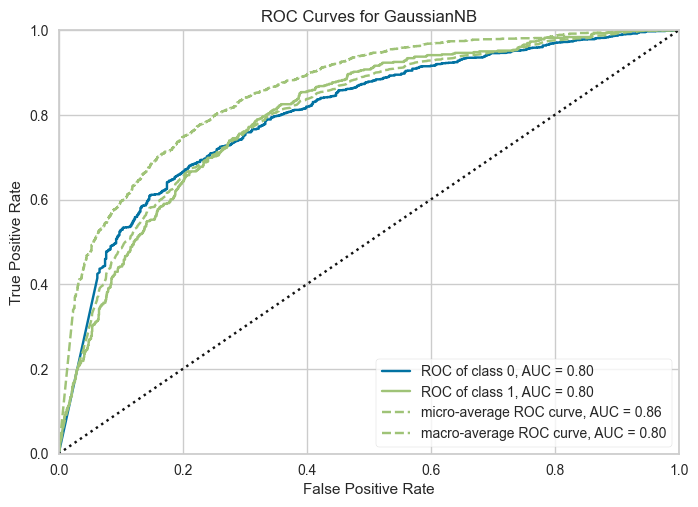

In [12]:
plot_model(best_model,plot='auc')

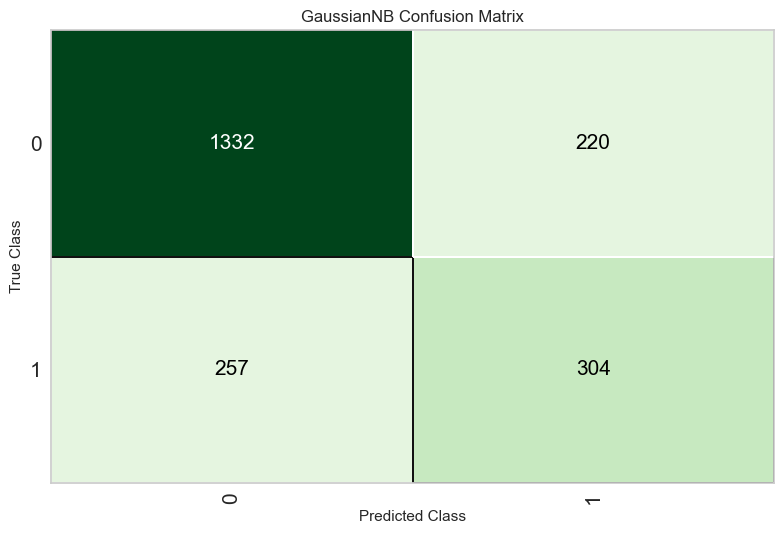

In [13]:
plot_model(best_model,plot='confusion_matrix')

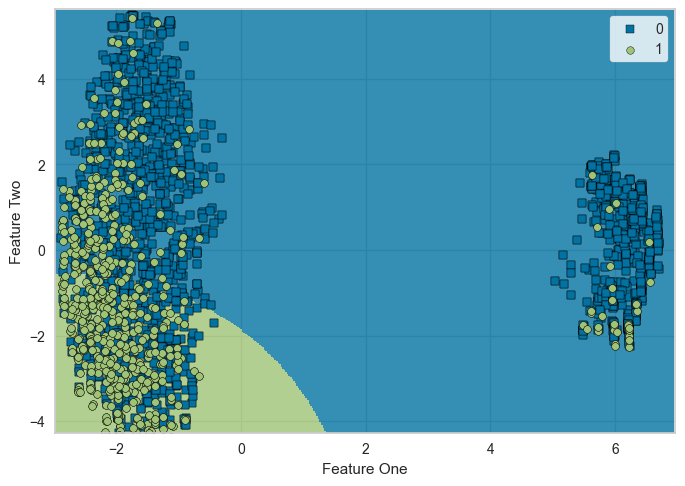

In [14]:
plot_model(best_model,plot='boundary')

In [15]:
#save_model(best_model,'outputs\model')

In [16]:
#import os
#from joblib import dump

In [17]:
# Directory and file path
#output_dir = "outputs"
#model_path = os.path.join(output_dir, "model.pkl")

In [18]:
# Create directory if it doesn't exist
#os.makedirs(output_dir, exist_ok=True)

In [19]:
# Save the model
#dump(best_model, model_path)

In [20]:
pwd

'C:\\Users\\HP\\Desktop\\dvc_tutorial\\churn_project\\data'

In [21]:

#save pipeline
save_model(best_model,'outputs\model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False...
                                                               verbose=0))),
                 ('rest_encoding',
                  TransformerWrapper(exclude=None, include=['TotalCharges'],
                       